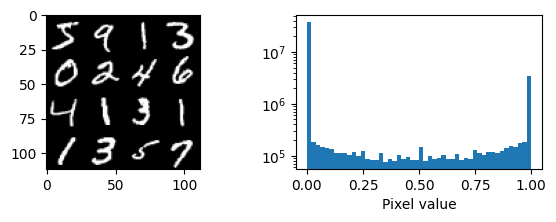

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

def rough_inspection(dataset, n_fig=4):
    figure = np.concatenate([np.reshape(dataset[n_fig*i:n_fig*(i+1)], (n_fig*28, 28)) for i in range(n_fig)], axis=1)

    plt.figure(figsize=(7,2))
    plt.subplot(1, 2, 1)
    plt.imshow(figure, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.hist(dataset.flatten(), bins=50)
    plt.yscale('log')
    plt.xlabel("Pixel value")
    plt.show()
    
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
train_idx = sum([np.arange(len(y_train))[y_train == i].tolist()[:4] for i in range(10)], [])
test_idx = sum([np.arange(len(y_test))[y_test == i].tolist()[:4] for i in range(10)], [])

Lx_train = x_train[train_idx]
Lx_test = x_test[test_idx]
Ly_train = y_train[train_idx]
Ly_test = y_test[test_idx]

px_train = (x_train / x_train.max())
px_test = (x_test / x_train.max()) 
pLx_train = (Lx_train / x_train.max())
pLx_test = (Lx_test / x_train.max()) 

py_train = np.stack([y_train == i for i in range(10)], axis=1)
py_test = np.stack([y_test == i for i in range(10)], axis=1)

rough_inspection(px_train)

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Conv2DTranspose, Reshape, MaxPooling2D, UpSampling2D, Flatten
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adam


encoder = Sequential([
    Reshape((28, 28, 1)),
    Conv2D(8, kernel_size=3, padding='same', activation='relu'),
    Conv2D(8, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=3, padding='same', activation='relu'),
    Conv2D(16, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(32, activation='tanh'),
    Dense(32, activation='tanh'),
    Dense(2, activation='linear')
])

encoder.build(input_shape=(None, 28, 28))
display(encoder.summary())

decoder = Sequential([
    Dense(32, activation='tanh'),
    Dense(28//4*28//4, activation='tanh'),
    Reshape((28//4, 28//4, 1)),
    Conv2DTranspose(32, kernel_size=(2, 2), padding='same', activation='relu'),
    Conv2DTranspose(32, kernel_size=(2, 2), padding='same', activation='relu'),
    UpSampling2D(size=(2 ,2)),
    Conv2DTranspose(16, kernel_size=(2, 2), padding='same', activation='relu'),
    Conv2DTranspose(16, kernel_size=(2, 2), padding='same', activation='relu'),
    UpSampling2D(size=(2 ,2)),
    Conv2DTranspose(8, kernel_size=(2, 2), padding='same', activation='relu'),
    Conv2DTranspose(1, kernel_size=(2, 2), padding='same', activation='sigmoid'),
    Reshape((28,28)),
])
decoder.build(input_shape=encoder.output_shape)

display(decoder.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         584       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        2320      
                                                        

2023-06-02 10:18:26.560767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 10:18:26.578595: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 10:18:26.580422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-02 10:18:26.582714: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

None

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                96        
                                                                 
 dense_4 (Dense)             (None, 49)                1617      
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 1)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 7, 7, 32)         160       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 7, 7, 32)         4128      
 ranspose)                                                       
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 32)      

None

  0%|          | 0/30 [00:00<?, ?it/s]2023-06-02 10:18:28.245508: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8800
2023-06-02 10:18:29.649103: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
100%|██████████| 30/30 [01:50<00:00,  3.70s/it]


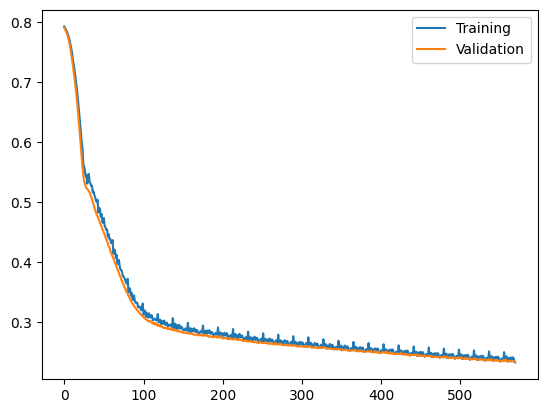

In [3]:
ae_optimizer = Adam(1e-3)

def ae_train_step(train_data, labels):
    enc_vars = encoder.trainable_weights
    dec_vars = decoder.trainable_weights

    ae_vars = enc_vars + dec_vars

    with tf.GradientTape() as tp:
        encoded = encoder(train_data)
        decoded = decoder(encoded)

        pins = tf.stack([tf.math.cos(2*np.pi*labels/10), tf.math.sin(2*np.pi*labels/10)], axis=1)
        labeled_loss = tf.reduce_mean(
            tf.where(tf.math.is_finite(labels), tf.linalg.norm(encoded - pins, axis=1), 0.)
        )
        
        loss = BinaryCrossentropy()(train_data, decoded) + 0.1*labeled_loss

    ae_grads = tp.gradient(loss, ae_vars)
    ae_optimizer.apply_gradients(zip(ae_grads, ae_vars))

    return loss

def ae_test_step(test_data, labels):
    encoded = encoder(test_data)
    decoded = decoder(encoded)

    pins = tf.stack([tf.math.cos(2*np.pi*labels/10), tf.math.sin(2*np.pi*labels/10)], axis=1)
    labeled_loss = tf.reduce_mean(
        tf.where(tf.math.is_finite(labels), tf.linalg.norm(encoded - pins, axis=1), 0.)
    )
        
    loss = BinaryCrossentropy()(test_data, decoded) + 0.1*labeled_loss

    return loss


losses = []
val_losses = []
chunks = [tf.constant(c) for c in np.split(px_train, 20)[:-1]]
label_chunks = [tf.constant(c, dtype=tf.float32) for c in np.split(y_train, 20)[:-1]]

val_chunk = tf.constant(px_test[:1000])
val_label = tf.constant(y_test[:1000], dtype=tf.float32)


## Reset the weights
from tensorflow.keras.models import clone_model
decoder = clone_model(decoder)
encoder = clone_model(encoder)

from tqdm import trange
for epoch in trange(30):
    for chunk, label_chunk in zip(chunks, label_chunks):
        losses.append(ae_train_step(chunk, label_chunk))
        val_losses.append(ae_test_step(val_chunk, val_label))

plt.plot(losses, label="Training")
plt.plot(val_losses, label="Validation")
plt.legend()
plt.show()

2/2 [==============================] - 0s 4ms/step


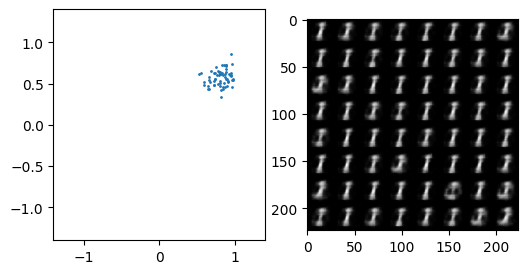

In [4]:
def test_digit(digit, decoder_net, n_fig=8):
    label = np.c_[np.cos(2*np.pi*digit/10), np.sin(2*np.pi*digit/10)]
    encoded = np.random.normal(label, 0.1, (n_fig*n_fig, 2))
    plt.figure(figsize=(6,3))
    plt.subplot(1, 2, 1)
    plt.scatter(encoded[:,0], encoded[:, 1], s=1)
    plt.ylim(-1.4, 1.4)
    plt.xlim(-1.4, 1.4)
    
    decoded = decoder_net.predict(encoded)
    figure = np.concatenate([np.reshape(decoded[n_fig*i:n_fig*(i+1)], (n_fig*28, 28)) for i in range(n_fig)], axis=1)
    plt.subplot(1, 2, 2)
    plt.imshow(figure, cmap='gray')

test_digit(1, decoder)

2/2 [==============================] - 0s 3ms/step


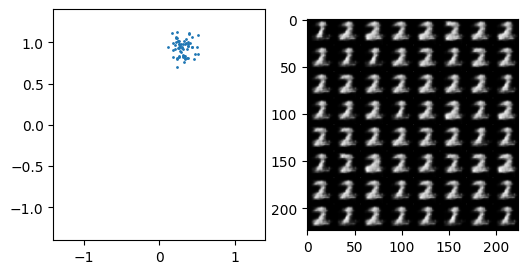

In [5]:
test_digit(2, decoder)

2/2 [==============================] - 0s 2ms/step


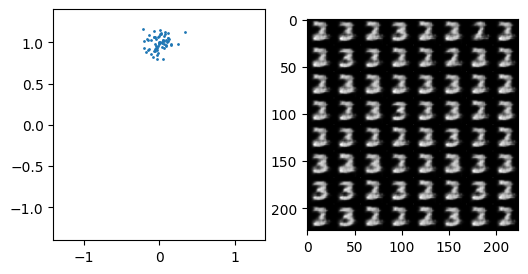

In [6]:
test_digit(2.5, decoder)

2/2 [==============================] - 0s 2ms/step


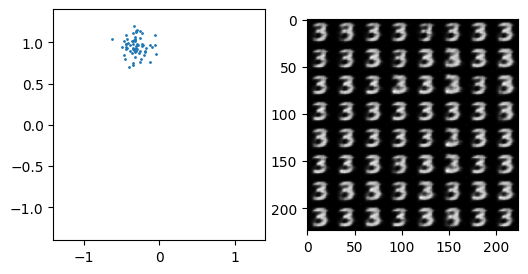

In [7]:
test_digit(3, decoder)

In [8]:
generator = Sequential([
    Flatten(),
    Dense(7*7*8, activation='tanh'),
    Reshape((7, 7, 8)),
    Conv2DTranspose(8, kernel_size=(3,3), activation='tanh', padding='same'),
    UpSampling2D(size=(2,2)),
    Conv2DTranspose(16, kernel_size=(3,3), activation='tanh', padding='same'),
    UpSampling2D(size=(2,2)),
    Conv2DTranspose(1, kernel_size=(3,3), activation='sigmoid', padding='same'),
    Reshape((28, 28))
])
generator.build(input_shape=(None, 28, 28, 1))

display(generator.summary())

discriminator = Sequential([
    Reshape((28, 28, 1)),
    Conv2D(16, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=L2(1e-3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(8, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=L2(1e-3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(4, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=L2(1e-3)),
    Flatten(),
    Dense(32, activation='tanh'),
    Dense(1, activation='sigmoid')
])

discriminator.build(input_shape=(None, 28, 28))
display(discriminator.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 392)               307720    
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 8)           0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 7, 7, 8)          584       
 ranspose)                                                       
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 14, 14, 16)      

None

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 4)          

None

100%|██████████| 100/100 [10:08<00:00,  6.08s/it]


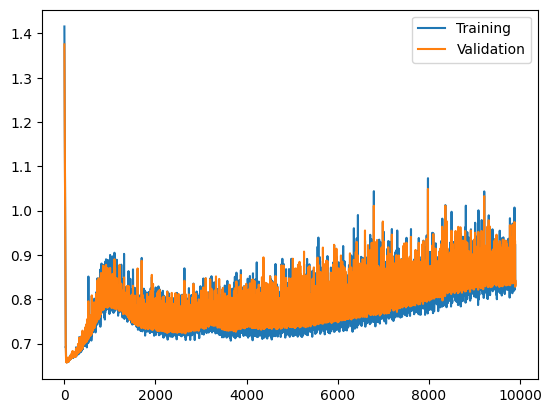

In [9]:
from tensorflow.keras.optimizers import RMSprop
g_optimizer = RMSprop(1e-4)
d_optimizer = RMSprop(5e-4)

def train_step (data):
    g_vars = generator.trainable_weights
    d_vars = discriminator.trainable_weights
    
    with tf.GradientTape() as g_tp, tf.GradientTape() as d_tp:
        generated = generator(tf.random.normal(data.shape))
        d_gen = discriminator(generated)
        d_ref = discriminator(data)
        n = tf.shape(d_gen)[0]
        d_loss = (
            BinaryCrossentropy()(tf.fill(n, 0.9), d_gen) + 
            BinaryCrossentropy()(tf.fill(n, 0.1), d_ref)
        )
        g_loss = -d_loss
        
    g_grads = g_tp.gradient(g_loss, g_vars)
    d_grads = d_tp.gradient(d_loss, d_vars)

    g_optimizer.apply_gradients(zip(g_grads, g_vars))
    d_optimizer.apply_gradients(zip(d_grads, d_vars))

    return d_loss
    
def test_step (data):
    generated = generator(tf.random.normal(data.shape))
    d_gen = discriminator(generated)
    d_ref = discriminator(data)
    
    n = tf.shape(data)[0]
        
    loss = (
        BinaryCrossentropy()(tf.fill(n, 0.9), d_gen) + 
        BinaryCrossentropy()(tf.fill(n, 0.1), d_ref)
    )
        
    return loss


losses = []
val_losses = []


losses = []
val_losses = []
chunks = [tf.constant(c) for c in np.split(px_train, 100)[:-1]]
label_chunks = [tf.constant(c, dtype=tf.float32) for c in np.split(y_train, 100)[:-1]]

val_chunk = tf.constant(px_test[:1000])
val_label = tf.constant(y_test[:1000], dtype=tf.float32)


## Reset the weights
from tensorflow.keras.models import clone_model
generator = clone_model(generator)
discriminator = clone_model(discriminator)

from tqdm import trange
for epoch in trange(100):
    for chunk in chunks:
        losses.append(train_step(chunk))
        val_losses.append(test_step(val_chunk))

plt.plot(losses, label="Training")
plt.plot(val_losses, label="Validation")
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step


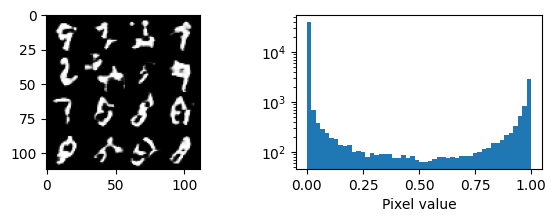

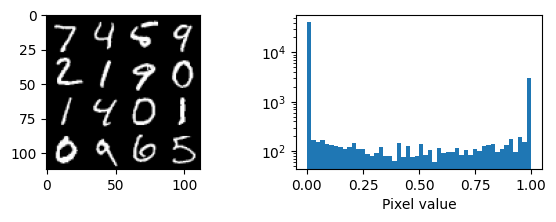

In [10]:
generated = generator.predict(np.random.normal(0, 1, (64, 28, 28)))
rough_inspection(generated)
rough_inspection(val_chunk.numpy()[:64])

In [183]:
from tensorflow import keras as K
from tensorflow.keras.layers import LeakyReLU

label = K.Input(10, dtype=tf.float32, name="label")/10 - 0.5
noise = tf.random.normal((tf.shape(label)[0], 64), 0., 1., name="noise")

labeled_noise = K.layers.Concatenate(axis=1)((label, noise))

generator_dnn = Sequential([
    Dense(7*7*6, activation='linear', kernel_initializer='he_normal'),
    LeakyReLU(),
    Reshape((7, 7, 6)),
    Conv2DTranspose(32, kernel_size=(3,3), activation='linear', padding='same'),
    LeakyReLU(),
    UpSampling2D(size=(2,2)),
    Conv2DTranspose(16, kernel_size=(3,3), activation='linear', padding='same'),
    LeakyReLU(),
    UpSampling2D(size=(2,2)),
    K.layers.Rescaling(10., offset=-5),
    Conv2DTranspose(1, kernel_size=(3,3), activation='sigmoid', padding='same'),
    Reshape((28, 28))
], name="generator_cnn")

generated = generator_dnn(labeled_noise)

generator = K.models.Model(inputs=label, outputs=generated, name="generator")

display(generator.summary())

generated_or_reference = K.Input((28, 28), dtype=tf.float32, name="gen_or_ref")

label_mapper = Sequential([
    Dense(28*28, activation='sigmoid'),
    Reshape((28, 28, 1))
], name="label_mapper")

labeled_generated = K.layers.Concatenate(axis=-1)((label_mapper(label), generated_or_reference[..., None]))

discriminator_dnn = Sequential([
    Conv2D(16, kernel_size=(5,5), activation='linear', padding='same', kernel_regularizer=L2(1e-3)),
    LeakyReLU(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(8, kernel_size=(5,5), activation='linear', padding='same', kernel_regularizer=L2(1e-3)),
    LeakyReLU(),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(4, kernel_size=(5,5), activation='linear', padding='same', kernel_regularizer=L2(1e-3)),
    LeakyReLU(),
    Flatten(),
    Dense(64, activation='linear', kernel_initializer='he_normal'),
    LeakyReLU(),
    Dense(1, activation='sigmoid')
], name="discriminator_cnn")

classifier = discriminator_dnn(labeled_generated)
discriminator = K.models.Model(inputs=(label, generated_or_reference), outputs=classifier, name="discriminator")

display(discriminator.summary())


Model: "generator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_84 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 tf.compat.v1.shape_51 (TFOpLam  (2,)                0           ['input_84[0][0]']               
 bda)                                                                                             
                                                                                                  
 tf.__operators__.getitem_87 (S  ()                  0           ['tf.compat.v1.shape_51[1][0]']  
 licingOpLambda)                                                                                  
                                                                                          

None

Model: "discriminator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_85 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 gen_or_ref (InputLayer)        [(None, 28, 28)]     0           []                               
                                                                                                  
 label_mapper (Sequential)      (None, 28, 28, 1)    8624        ['input_85[0][0]']               
                                                                                                  
 tf.__operators__.getitem_88 (S  (None, 28, 28, 1)   0           ['gen_or_ref[0][0]']             
 licingOpLambda)                                                                      

None

100%|██████████| 100/100 [13:50<00:00,  8.30s/it]


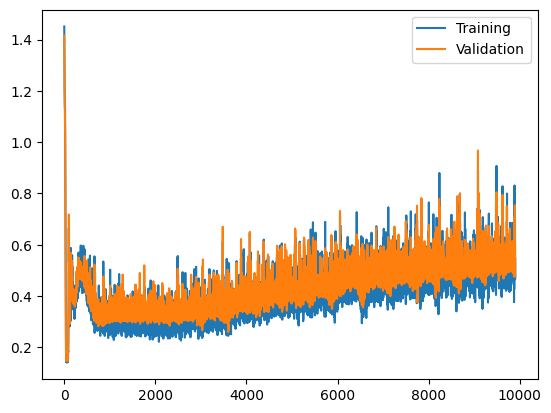

In [184]:
g_optimizer = Adam(1e-4)
d_optimizer = Adam(5e-4)

def train_step (data, label):
    g_vars = generator.trainable_weights
    d_vars = discriminator.trainable_weights
    
    with tf.GradientTape() as g_tp, tf.GradientTape() as d_tp:
        generated = generator(label)
        d_gen = discriminator((label, generated))
        d_ref = discriminator((label, data))
        n = tf.shape(d_gen)[0]
        d_loss = (
            BinaryCrossentropy()(tf.fill(n, 0.99), d_gen) + 
            BinaryCrossentropy()(tf.fill(n, 0.01), d_ref)
        )
        g_loss = -d_loss
        
    g_grads = g_tp.gradient(g_loss, g_vars)
    d_grads = d_tp.gradient(d_loss, d_vars)

    g_optimizer.apply_gradients(zip(g_grads, g_vars))
    d_optimizer.apply_gradients(zip(d_grads, d_vars))

    return d_loss
    
def test_step (data, label):
    generated = generator(label)
    d_gen = discriminator((label, generated))
    d_ref = discriminator((label, data))
    
    n = tf.shape(data)[0]
        
    loss = (
        BinaryCrossentropy()(tf.fill(n, 0.99), d_gen) + 
        BinaryCrossentropy()(tf.fill(n, 0.01), d_ref)
    )
        
    return loss


losses = []
val_losses = []


losses = []
val_losses = []
chunks = [tf.constant(c) for c in np.split(px_train, 100)[:-1]]
label_chunks = [tf.constant(c, dtype=tf.float32) for c in np.split(py_train, 100)[:-1]]

val_chunk = tf.constant(px_test[:1000])
val_label = tf.constant(py_test[:1000], dtype=tf.float32)


## Reset the weights
from tensorflow.keras.models import clone_model
generator = clone_model(generator)
discriminator = clone_model(discriminator)

from tqdm import trange
for epoch in trange(100):
    for chunk, labels in zip(chunks, label_chunks):
        losses.append(train_step(chunk, labels))
        val_losses.append(test_step(val_chunk, val_label))
        
plt.plot(losses, label="Training")
plt.plot(val_losses, label="Validation")
plt.legend()
plt.show()

2/2 [==============================] - 0s 2ms/step


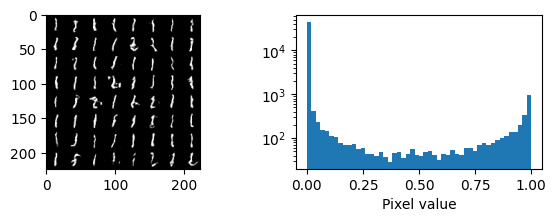

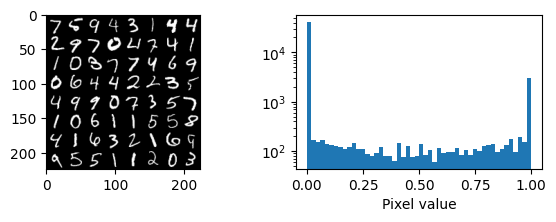

In [190]:
generated = generator.predict([[i==1 for i in range(10)] for _ in range(64)])
rough_inspection(generated, n_fig=8)
rough_inspection(val_chunk.numpy()[:64], n_fig=8)